In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/raw/UNCLEANED_2.csv')

# List of numerical columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Descriptive statistics
df[numerical_features].describe().transpose()


/var/folders/b_/y_jk5_7x3fvccjvy28hp6r640000gn/T/ipykernel_95881/2423847351.py:4: DtypeWarning: Columns (259,283,307) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/UNCLEANED_2.csv')


count        mean         std        min  \
result                   13532.0    0.495270    0.499996   0.000000   
total_comp_time          13532.0  623.440955  367.403760   5.000000   
round                    13532.0    2.310893    1.018601   1.000000   
reach                    12057.0   72.139587    4.174607  58.000000   
height                   13518.0   70.426542    3.480258  60.000000   
...                          ...         ...         ...        ...   
ground_strikes_accuracy  13513.0   42.448777   40.056486   0.000000   
takedowns_def            13513.0   72.927770   35.839750   0.000000   
reach_differential       11233.0    1.001018    0.045059   0.828947   
height_differential      13485.0    1.000753    0.036673   0.835443   
age_differential         12974.0    1.010427    0.146908   0.594595   

                                25%    50%         75%          max  
result                     0.000000    0.0    1.000000     1.000000  
total_comp_time          265.000000  773.0  900.000000  2160.000000  
round                      1.000000    3.0    3.000000     5.000000  
reach                     70.000000   72.0   75.000000    84.000000  
height                    68.000000   71.0   73.000000    83.000000  
...                             ...    ...         ...          ...  
ground_strikes_accuracy    0.000000   50.0   78.947368   100.000000  
takedowns_def             50.000000  100.0  100.000000   100.000000  
reach_differential         0.972222    1.0    1.028571     1.206349  
height_differential        0.973333    1.0    1.027397     1.196970  
age_differential           0.909091    1.0    1.100000     1.681818  

[405 rows x 8 columns]

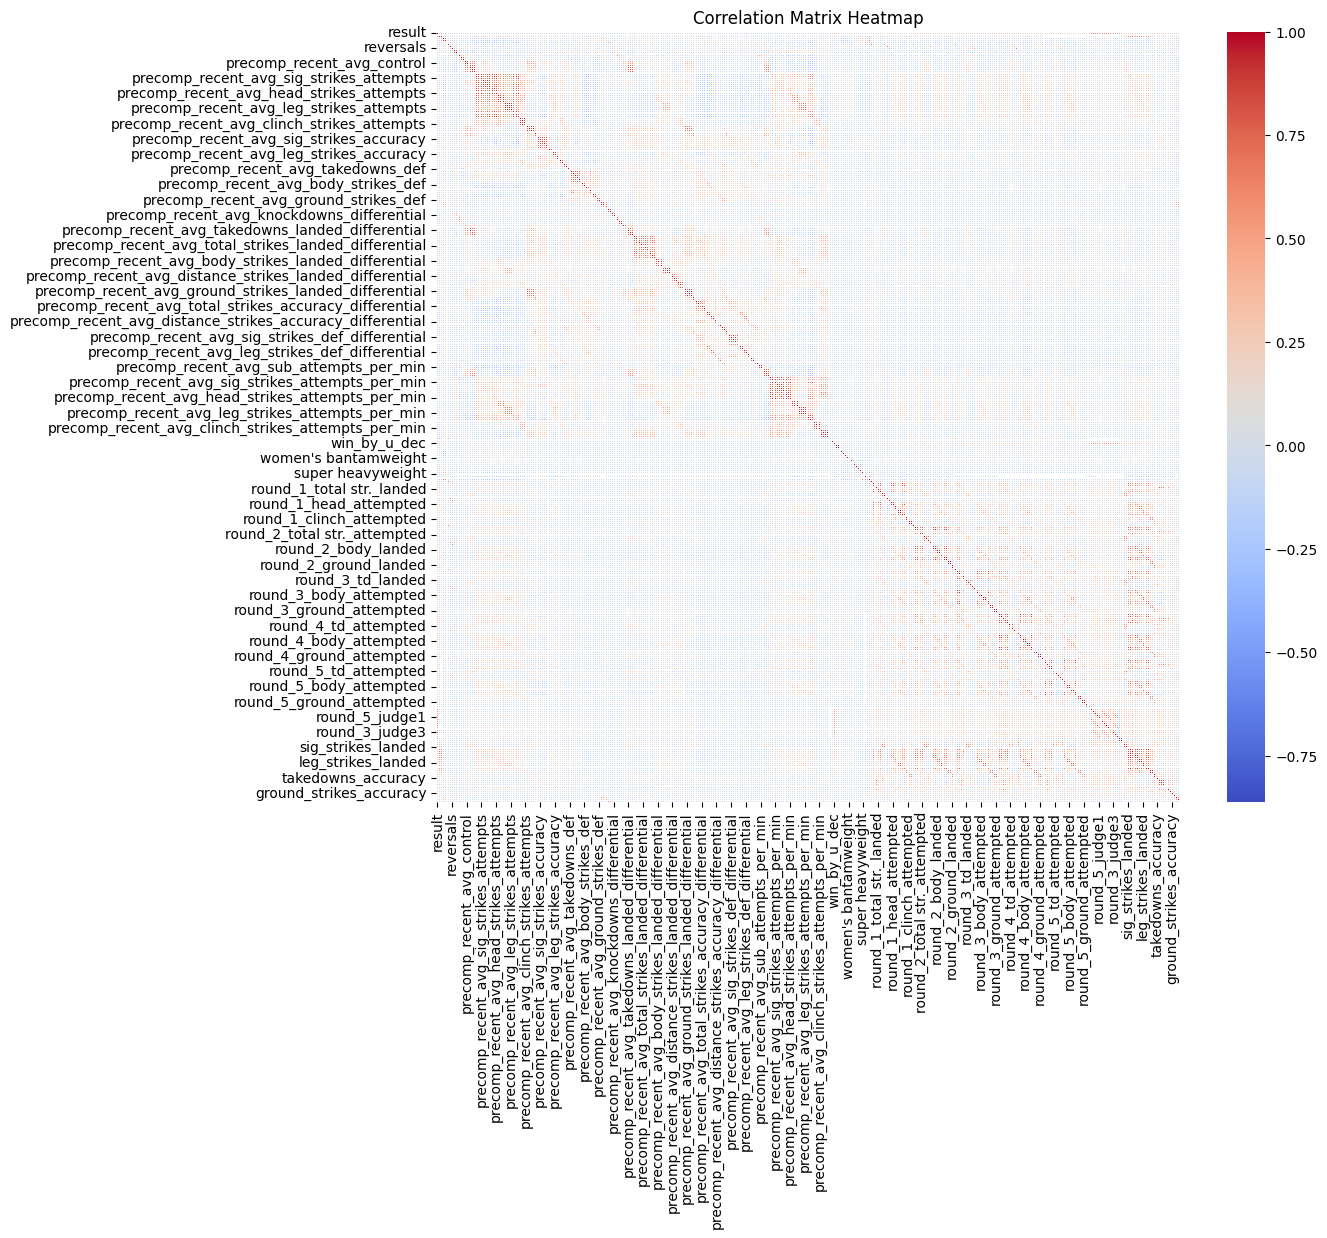

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Compute correlation matrix
corr_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [8]:
# Percentage of missing values per column
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)


round_4_judge2    97.428318
round_5_judge2    97.428318
round_5_judge1    97.428318
round_4_judge1    97.428318
round_4_judge3    97.398758
                    ...    
height             0.103458
location           0.007390
latitude           0.007390
longitude          0.007390
elevation          0.007390
Length: 382, dtype: float64


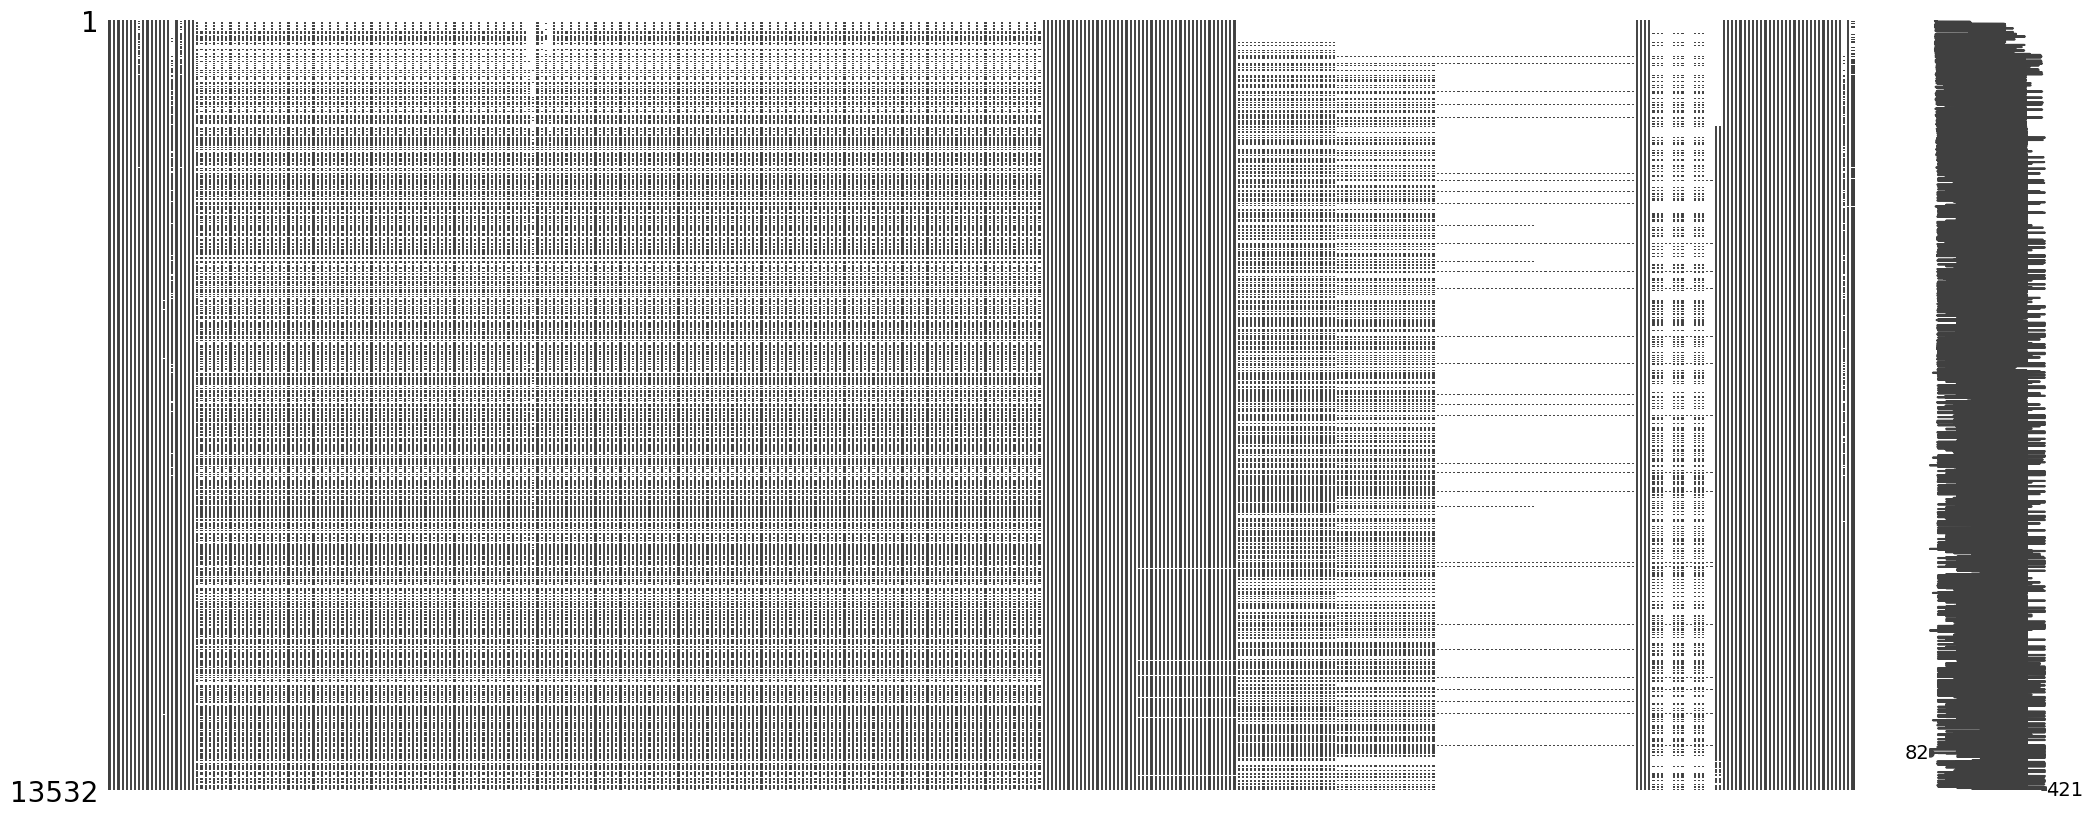

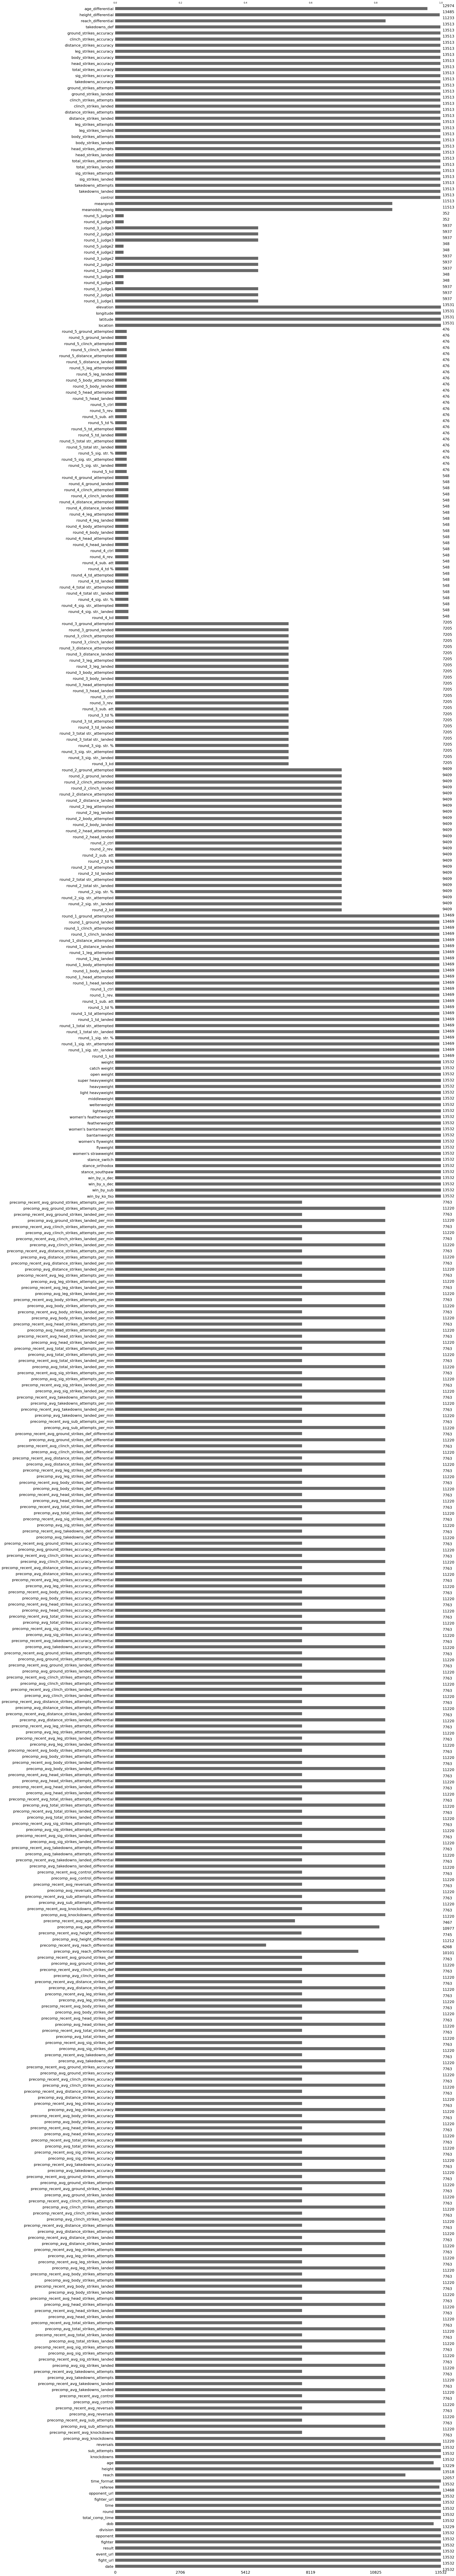

In [10]:
# Install missingno library if not already installed
# !pip install missingno

import missingno as msno

# Visualize missingness matrix
msno.matrix(df)
plt.show()

# Visualize missingness bar chart
msno.bar(df)
plt.show()

In [14]:
from sklearn.impute import KNNImputer

# Select numerical columns except those starting with 'round' or 'mean'
num_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns
            if not (col.startswith('round') or col.startswith('mean'))]

# Initialize KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
df[num_cols] = knn_imputer.fit_transform(df[num_cols])

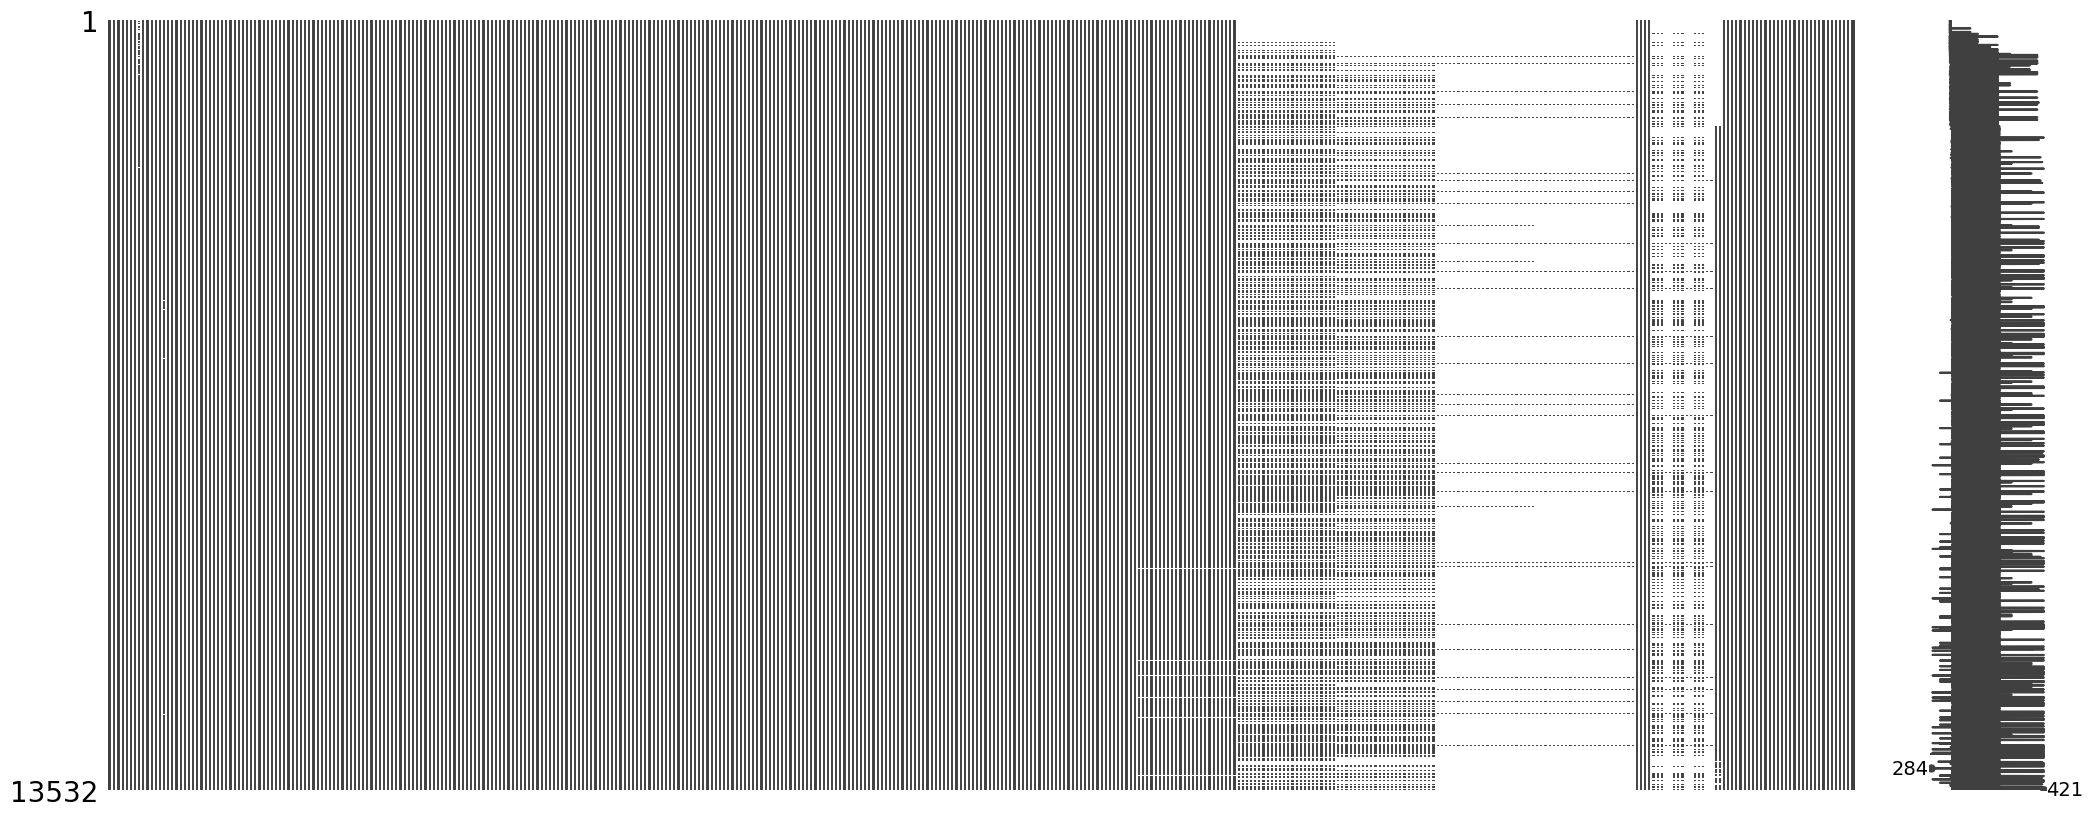

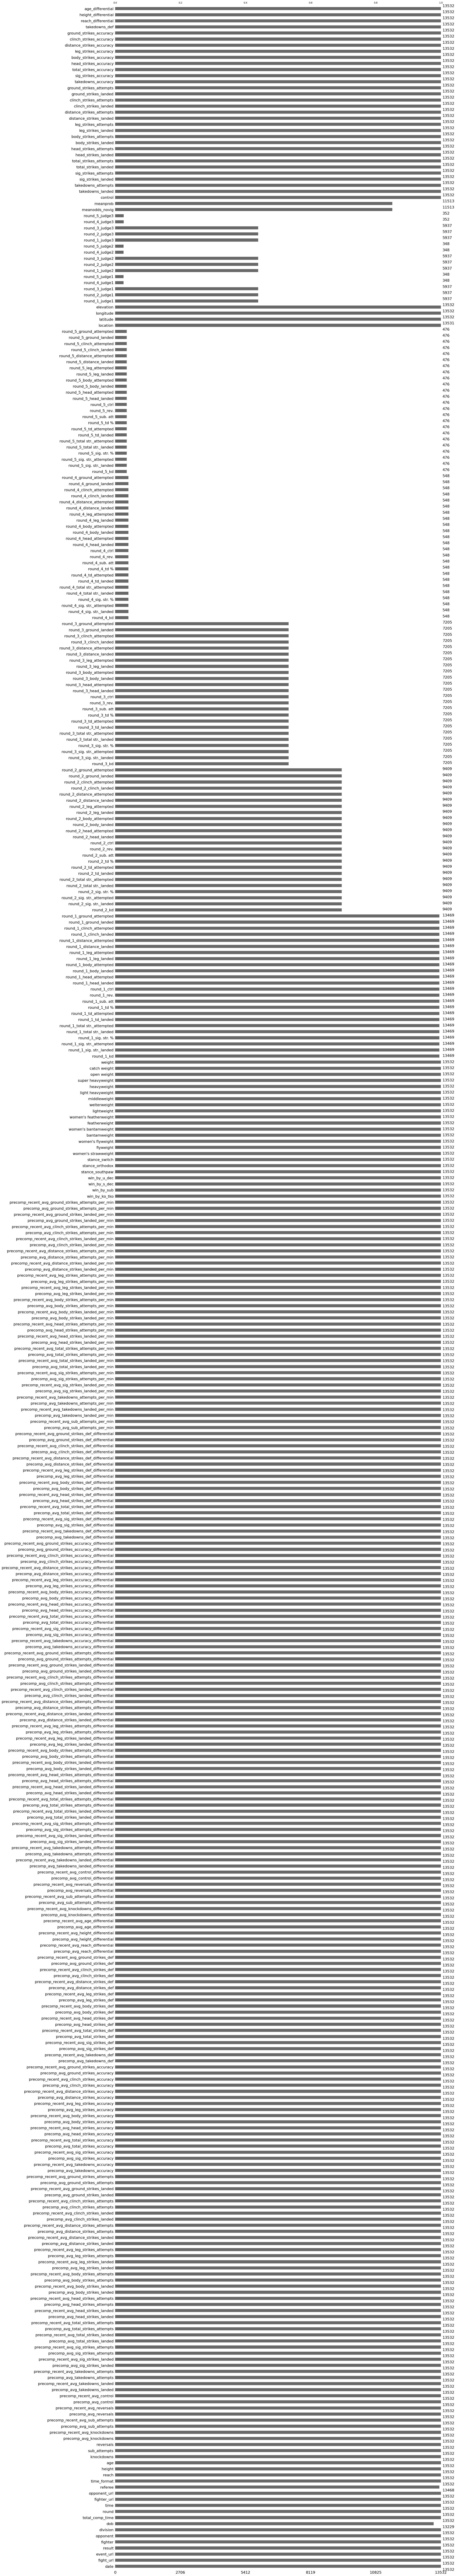

In [15]:
# Install missingno library if not already installed
# !pip install missingno

import missingno as msno

# Visualize missingness matrix
msno.matrix(df)
plt.show()

# Visualize missingness bar chart
msno.bar(df)
plt.show()

In [ ]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract date components
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek